# Models

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [7]:
df3 = pd.read_csv('data/df3', index_col = 'Census Tract')

In [8]:
df3.drop(columns = ['SB 535 Disadvantaged Community', 'pm_halves', 'diesel_levels', 'pbs'], 
                    axis = 1, inplace = True)


In [9]:
df3.shape

(8024, 34)

In [10]:
df3.head()

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score,disadvantaged_Yes,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6071001600,6133,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,1,1,0,0,1,0,0,0,0,0,0,0,0,1
6019000200,3167,0.062,15.40,47.445,681.20,3.03,12454.948410,576.52,22.0,30.25,0.200,0,2.50,8.76,10.16,42.3,16.7,16.1,40.1,9.81,1,1,0,0,1,0,0,0,0,0,0,1,0,0
6077000801,6692,0.046,12.54,24.117,278.76,12.93,2387.782922,1305.01,50.1,132.10,0.795,19,27.00,9.17,6.23,40.8,15.3,19.6,21.1,8.99,1,1,0,1,0,0,0,0,0,0,0,0,1,0
6019001500,2206,0.065,15.40,18.846,1000.24,3518.41,21790.706720,435.16,60.0,54.20,13.100,0,50.80,9.88,4.50,45.1,14.7,18.6,28.1,8.30,1,1,0,1,0,0,0,0,0,0,0,0,1,0


## Train Test Split

In [11]:
df3_features = df3.drop(columns = 'Low Birth Weight', axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df3_features, 
                                                    df3['Low Birth Weight'], 
                                                    random_state=20, 
                                                    test_size=0.2)

In [13]:
df3.head(2)

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score,disadvantaged_Yes,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6071001600,6133,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,1,1,0,0,1,0,0,0,0,0,0,0,0,1


## OLS

In [14]:
df3.rename(columns = {'Total Population': 'total_pop', 'PM2.5' : 'PM2_5', 'Diesel PM' : 'diesel_pm', 
                     'Drinking Water' : 'drinking_water', 'Tox. Release' : 'tox_release', 
                     'Cleanup Sites' : 'cleanup_sites', 'Groundwater Threats' : 'groundwater_threats', 
                     'Haz. Waste' : 'haz_waste', 'Imp. Water Bodies' : 'imp_water_bodies', 
                     'Solid Waste' : 'solid_waste', 
                     'Pollution Burden Score' : 'pollution_burden_score', 'Low Birth Weight' : 'lbw', 
                     'Linguistic Isolation' : 'linguistic_isolation', 'Housing Burden' : 'housing_burden', 
                     'Pop. Char. Score' : 'pop_char_score'}, inplace = True)

In [15]:
#create ols model
outcome = 'lbw'
predictors = df3.drop(['lbw'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lbw   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -12747.
No. Observations:                8024   AIC:                         2.556e+04
Df Residuals:                    7990   BIC:                         2.580e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.7812      0.181     15.359      0.000       2.426       3.136
total_pop              -1.475e-05   6.93e-06     -2.127      0.033   -2.83e-05   -1.16e-06
Ozone                    -10.8749      1.896     -5.735      0.000     -14.592      -7.158
PM2_5                      0.0612      0.009      6.704      0.000       0.043       0.079
diesel_pm                  0.0022      0.001      1.747      0.081      -0.000       0.005
drinking_water             0.0003   7.59e-05      3.744      0.000       0.000       0.000
Pesticides             -2.527e-06   4.94e-06     -0.512      0.609   -1.22e-05    7.15e-06
tox_release             1.833e-06    1.1e-06      1.663      0.096   -3.28e-07    3.99e-06
Traffic                 6.482e-05   1.67e-05      3.872      0.000     3.2e-05    9.76e-05
cleanup_sites              0.0033      0.001      3.107      0.002       0.001       0.005
groundwater_threats       -0.0015      0.000     -3.477      0.001      -0.002      -0.001
haz_waste                 -0.0007      0.011     -0.063      0.950      -0.022       0.021
imp_water_bodies           0.0048      0.004      1.368      0.171      -0.002       0.012
solid_waste                0.0033      0.003      0.951      0.342      -0.003       0.010
pollution_burden_score    -0.1105      0.050     -2.208      0.027      -0.209      -0.012
Education                 -0.0345      0.002    -20.478      0.000      -0.038      -0.031
linguistic_isolation      -0.0043      0.002     -2.014      0.044      -0.008      -0.000
Unemployment              -0.0497      0.004    -14.135      0.000      -0.057      -0.043
housing_burden            -0.0195      0.002     -9.156      0.000      -0.024      -0.015
pop_char_score             0.7217      0.013     55.944      0.000       0.696       0.747
disadvantaged_Yes          0.1796      0.050      3.595      0.000       0.082       0.277
pm_halves_pm_upper        -0.1184      0.047     -2.530      0.011      -0.210      -0.027
diesel_levels_diesel_2     0.0085      0.043      0.201      0.841      -0.075       0.092
diesel_levels_diesel_3     0.0288      0.051      0.562      0.574      -0.072       0.129
diesel_levels_diesel_4     0.0208      0.066      0.313      0.754      -0.109       0.151
pbs_2                      0.2473      0.149      1.655      0.098      -0.046       0.540
pbs_3                      0.2483      0.164      1.518      0.129      -0.072       0.569
pbs_4                      0.2848      0.191      1.487      0.137      -0.091       0.660
pbs_5                      0.2983      0.226      1.321      0.187      -0.144       0.741
pbs_6                      0.3250      0.262      1.241      0.215      -0.189       0.839
pbs_7                      0.3753      0.302      1.242      0.214      -0.217  

In [16]:
df3.head(2)

,total_pop,Ozone,PM2_5,diesel_pm,drinking_water,Pesticides,tox_release,Traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,Education,linguistic_isolation,Unemployment,housing_burden,pop_char_score,disadvantaged_Yes,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6071001600,6133,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,1,1,0,0,1,0,0,0,0,0,0,0,0,1


In [17]:
df3.drop(columns = ['PM2_5', 'diesel_pm', 'pollution_burden_score'], axis = 1, inplace = True)

In [18]:
#create ols model
outcome = 'lbw'
predictors = df3.drop(['lbw'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lbw   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:03:45   Log-Likelihood:                -12772.
No. Observations:                8024   AIC:                         2.561e+04
Df Residuals:                    7993   BIC:                         2.582e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.9539      0.159     18.636      0.000       2.643       3.265
total_pop              -1.331e-05   6.93e-06     -1.920      0.055   -2.69e-05    2.79e-07
Ozone                     -8.5268      1.851     -4.608      0.000     -12.154      -4.899
drinking_water             0.0002   7.46e-05      2.884      0.004    6.89e-05       0.000
Pesticides             -3.523e-06   4.95e-06     -0.712      0.476   -1.32e-05    6.18e-06
tox_release             1.252e-06    1.1e-06      1.136      0.256   -9.09e-07    3.41e-06
Traffic                 5.324e-05   1.66e-05      3.205      0.001    2.07e-05    8.58e-05
cleanup_sites              0.0031      0.001      2.979      0.003       0.001       0.005
groundwater_threats       -0.0016      0.000     -3.871      0.000      -0.002      -0.001
haz_waste                 -0.0011      0.011     -0.103      0.918      -0.023       0.020
imp_water_bodies           0.0019      0.003      0.539      0.590      -0.005       0.009
solid_waste               -0.0007      0.003     -0.212      0.832      -0.007       0.006
Education                 -0.0343      0.002    -20.367      0.000      -0.038      -0.031
linguistic_isolation      -0.0034      0.002     -1.586      0.113      -0.008       0.001
Unemployment              -0.0489      0.004    -13.882      0.000      -0.056      -0.042
housing_burden            -0.0211      0.002     -9.946      0.000      -0.025      -0.017
pop_char_score             0.7145      0.013     55.462      0.000       0.689       0.740
disadvantaged_Yes          0.2106      0.049      4.258      0.000       0.114       0.308
pm_halves_pm_upper         0.0515      0.038      1.353      0.176      -0.023       0.126
diesel_levels_diesel_2     0.0526      0.041      1.276      0.202      -0.028       0.133
diesel_levels_diesel_3     0.0874      0.047      1.852      0.064      -0.005       0.180
diesel_levels_diesel_4     0.1330      0.051      2.587      0.010       0.032       0.234
pbs_2                      0.2207      0.144      1.531      0.126      -0.062       0.503
pbs_3                      0.1663      0.141      1.178      0.239      -0.110       0.443
pbs_4                      0.1362      0.144      0.948      0.343      -0.146       0.418
pbs_5                      0.0755      0.149      0.508      0.611      -0.216       0.367
pbs_6                      0.0124      0.156      0.080      0.936      -0.293       0.318
pbs_7                     -0.0367      0.166     -0.222      0.824      -0.361       0.288
pbs_8                     -0.0656      0.185     -0.354      0.723      -0.429       0.298
pbs_9                     -0.0700      0.258     -0.272      0.786      -0.575       0.435
pbs_10                     0.6914      1.207      0.573      0.567      -1.675  

## Baseline Predict Model

In [19]:
df3_features = df3.drop(columns = 'lbw', axis = 1)

In [20]:
#fit to train data

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [21]:
#predict on train and test set
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [22]:
#give true value and predictions
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
df3_rmse = np.sqrt(mse)

In [23]:
print(mse)
print(df3_rmse)

1.3881649981237612
1.1782041411078816


In [24]:
#give true value and predictions
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
df3_test_rmse = np.sqrt(test_mse)

In [25]:
print(test_mse)
print(df3_test_rmse)

1.4766696531524885
1.2151829710592923


## Evaluate Model

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Low Birth Weight'>

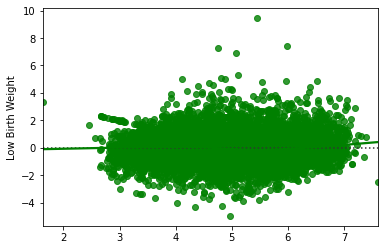

In [26]:
#Plot Residuals
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


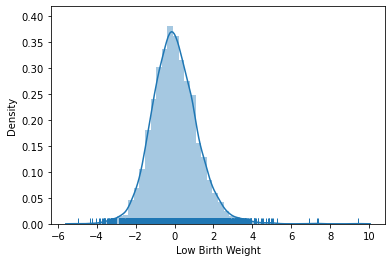

In [27]:
#Plot Residuals
residuals_2 =  y_train - y_train_pred
sns.distplot(residuals_2, kde=True, rug=True);

In [28]:
#Run Shapiro-Wilk test 
from scipy import stats
stats.shapiro(residuals_2)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9841181635856628, pvalue=3.098079874527671e-26)

In [29]:
df3.head()

,total_pop,Ozone,drinking_water,Pesticides,tox_release,Traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,lbw,Education,linguistic_isolation,Unemployment,housing_burden,pop_char_score,disadvantaged_Yes,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,0.065,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,7.44,53.3,16.2,17.6,26.0,9.55,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6071001600,6133,0.062,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,7.04,53.3,33.4,12.3,34.1,9.07,1,1,0,0,1,0,0,0,0,0,0,0,0,1
6019000200,3167,0.062,681.20,3.03,12454.948410,576.52,22.0,30.25,0.200,0,2.50,10.16,42.3,16.7,16.1,40.1,9.81,1,1,0,0,1,0,0,0,0,0,0,1,0,0
6077000801,6692,0.046,278.76,12.93,2387.782922,1305.01,50.1,132.10,0.795,19,27.00,6.23,40.8,15.3,19.6,21.1,8.99,1,1,0,1,0,0,0,0,0,0,0,0,1,0
6019001500,2206,0.065,1000.24,3518.41,21790.706720,435.16,60.0,54.20,13.100,0,50.80,4.50,45.1,14.7,18.6,28.1,8.30,1,1,0,1,0,0,0,0,0,0,0,0,1,0


## With Dem

In [30]:
ces3 = pd.read_csv('data/ces3')

In [31]:
ces3

,Unnamed: 0,Total Population,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score,disadvantaged_Yes,pm_halves,diesel_levels,pbs,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10,less_10_yrs,11_64_yrs,greater_65,hispanic,white,african_american,native_american,asian_american,other
0,6019001100,3174,Yes,0.065,15.400000,48.524,681.200000,2.75,18551.957190,909.140000,80.5,45.75,0.795,0,21.75,9.85,7.440000,53.300000,16.200000,17.600000,26.000000,9.550000,1,pm_upper,diesel_4,9,1,0,0,1,0,0,0,0,0,0,0,1,0,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
1,6071001600,6133,Yes,0.062,13.310000,38.556,904.660000,1.37,7494.236622,782.260000,66.2,36.00,1.250,5,12.00,10.00,7.040000,53.300000,33.400000,12.300000,34.100000,9.070000,1,pm_upper,diesel_4,10,1,0,0,1,0,0,0,0,0,0,0,0,1,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7
2,6019000200,3167,Yes,0.062,15.400000,47.445,681.200000,3.03,12454.948410,576.520000,22.0,30.25,0.200,0,2.50,8.76,10.160000,42.300000,16.700000,16.100000,40.100000,9.810000,1,pm_upper,diesel_4,8,1,0,0,1,0,0,0,0,0,0,1,0,0,21.5,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8
3,6077000801,6692,Yes,0.046,12.540000,24.117,278.760000,12.93,2387.782922,1305.010000,50.1,132.10,0.795,19,27.00,9.17,6.230000,40.800000,15.300000,19.600000,21.100000,8.990000,1,pm_upper,diesel_3,9,1,0,1,0,0,0,0,0,0,0,0,1,0,18.7,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8
4,6019001500,2206,Yes,0.065,15.400000,18.846,1000.240000,3518.41,21790.706720,435.160000,60.0,54.20,13.100,0,50.80,9.88,4.500000,45.100000,14.700000,18.600000,28.100000,8.300000,1,pm_upper,diesel_3,9,1,0,1,0,0,0,0,0,0,0,0,1,0,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,6009000504,942,No,0.055,4.645934,0.334,47.360000,0.76,0.179624,99.330000,0.0,0.00,0.000,0,8.20,2.14,4.976329,19.121779,10.417862,10.214327,19.327913,5.174153,0,pm_lower,diesel_1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,6.5,69.6,23.9,6.3,88.7,0.1,0.2,1.7,3.0
8020,6065940100,166,No,0.044,9.945784,0.226,472.372294,5.94,2.150919,72.490000,0.0,0.00,0.000,1,0.00,2.08,4.976329,19.121779,10.417862,10.214327,19.327913,5.174153,0,pm_lower,diesel_1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,2.4,51.8,45.8,1.8,92.8,0.0,0.6,0.0,4.8
8021,6053011502,1710,No,0.035,3.991772,0.082,429.940000,0.00,0.000990,216.010000,10.0,10.00,0.000,2,0.00,1.97,4.976329,19.121779,1.600000,10.214327,19.327913,5.174153,0,pm_lower,diesel_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7.7,79.0,13.3,22.5,73.9,0.2,0.4,1.4,1.7
8022,6083980100,11,No,0.040,9.536303,0.158,472.372294,0.00,4.891769,943.043646,0.0,3.00,0.000,0,0.00,1.40,4.976329,19.121779,10.417862,10.214327,19.327913,5.174153,0,pm_lower,diesel_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1,81.8,9.1,18.2,54.5,0.0,0.0,0.0,27.3


In [33]:
ces3.drop(columns = ['Unnamed: 0'], inplace = True)

In [38]:
ces3.rename(columns = {'Total Population': 'total_pop', 'PM2.5' : 'PM2_5', 'Diesel PM' : 'diesel_pm', 
                     'Drinking Water' : 'drinking_water', 'Tox. Release' : 'tox_release', 
                     'Cleanup Sites' : 'cleanup_sites', 'Groundwater Threats' : 'groundwater_threats', 
                     'Haz. Waste' : 'haz_waste', 'Imp. Water Bodies' : 'imp_water_bodies', 
                     'Solid Waste' : 'solid_waste', 
                     'Pollution Burden Score' : 'pollution_burden_score', 'Low Birth Weight' : 'lbw', 
                     'Linguistic Isolation' : 'linguistic_isolation', 'Housing Burden' : 'housing_burden', 
                     'Pop. Char. Score' : 'pop_char_score', '11_64_yrs': 'yrs_11_64'}, inplace = True)

In [40]:
ces3.drop(columns = ['SB 535 Disadvantaged Community', 'pm_halves', 'diesel_levels', 'pbs'], 
                    axis = 1, inplace = True)

In [41]:
#create ols model
outcome = 'lbw'
predictors = ces3.drop(['lbw'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model2 = ols(formula=formula, data=ces3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lbw   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:16:12   Log-Likelihood:                -12471.
No. Observations:                8024   AIC:                         2.503e+04
Df Residuals:                    7982   BIC:                         2.532e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0055      0.006      1.000      0.317      -0.005       0.016
total_pop              -1.269e-05   7.02e-06     -1.807      0.071   -2.65e-05    1.08e-06
Ozone                     -3.7508      1.912     -1.962      0.050      -7.498      -0.003
PM2_5                      0.0536      0.009      5.984      0.000       0.036       0.071
diesel_pm                  0.0006      0.001      0.523      0.601      -0.002       0.003
drinking_water             0.0003   7.36e-05      3.529      0.000       0.000       0.000
Pesticides               2.15e-06   4.79e-06      0.449      0.653   -7.23e-06    1.15e-05
tox_release             1.593e-06   1.07e-06      1.490      0.136   -5.02e-07    3.69e-06
Traffic                 6.773e-05   1.63e-05      4.168      0.000    3.59e-05    9.96e-05
cleanup_sites              0.0025      0.001      2.492      0.013       0.001       0.005
groundwater_threats       -0.0013      0.000     -3.269      0.001      -0.002      -0.001
haz_waste                 -0.0027      0.011     -0.253      0.800      -0.023       0.018
imp_water_bodies           0.0063      0.003      1.846      0.065      -0.000       0.013
solid_waste                0.0036      0.003      1.075      0.283      -0.003       0.010
pollution_burden_score    -0.1115      0.048     -2.303      0.021      -0.206      -0.017
Education                 -0.0156      0.002     -6.718      0.000      -0.020      -0.011
linguistic_isolation      -0.0135      0.002     -5.609      0.000      -0.018      -0.009
Unemployment              -0.0521      0.003    -15.091      0.000      -0.059      -0.045
housing_burden            -0.0211      0.002     -9.908      0.000      -0.025      -0.017
pop_char_score             0.6834      0.014     48.648      0.000       0.656       0.711
disadvantaged_Yes          0.1876      0.049      3.827      0.000       0.092       0.284
pm_halves_pm_upper        -0.1503      0.047     -3.232      0.001      -0.241      -0.059
diesel_levels_diesel_2     0.0136      0.042      0.322      0.748      -0.069       0.096
diesel_levels_diesel_3    -0.0040      0.051     -0.079      0.937      -0.104       0.096
diesel_levels_diesel_4    -0.0456      0.065     -0.698      0.485      -0.174       0.083
pbs_2                      0.1315      0.145      0.908      0.364      -0.153       0.416
pbs_3                      0.2016      0.159      1.272      0.204      -0.109       0.512
pbs_4                      0.2396      0.185      1.292      0.196      -0.124       0.603
pbs_5                      0.2289      0.219      1.047      0.295      -0.200       0.657
pbs_6                      0.3103      0.254      1.223      0.221      -0.187       0.807
pbs_7                      0.3753      0.292      1.283      0.199      -0.198  

In [42]:
ces3.drop(columns = ['pm_halves_pm_upper', 'diesel_levels_diesel_2', 'diesel_levels_diesel_3', 
                    'diesel_levels_diesel_4', 'pbs_2', 'pbs_3', 'pbs_4', 'pbs_5', 'pbs_6', 
                    'pbs_7', 'pbs_8', 'pbs_9', 'pbs_10'], axis = 1, inplace = True)

In [43]:
#create ols model
outcome = 'lbw'
predictors = ces3.drop(['lbw'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model2 = ols(formula=formula, data=ces3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lbw   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     223.7
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:18:52   Log-Likelihood:                -12481.
No. Observations:                8024   AIC:                         2.502e+04
Df Residuals:                    7995   BIC:                         2.522e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0057      0.005      1.034      0.301      -0.005       0.016
total_pop              -1.067e-05   6.97e-06     -1.530      0.126   -2.43e-05       3e-06
Ozone                     -3.4533      1.874     -1.842      0.065      -7.128       0.221
PM2_5                      0.0363      0.007      5.017      0.000       0.022       0.051
diesel_pm                  0.0001      0.001      0.133      0.894      -0.002       0.002
drinking_water             0.0003   7.25e-05      3.530      0.000       0.000       0.000
Pesticides              3.317e-06   4.76e-06      0.696      0.486   -6.02e-06    1.27e-05
tox_release             1.337e-06   1.06e-06      1.257      0.209   -7.49e-07    3.42e-06
Traffic                 6.822e-05   1.62e-05      4.224      0.000    3.66e-05    9.99e-05
cleanup_sites              0.0030      0.001      2.981      0.003       0.001       0.005
groundwater_threats       -0.0013      0.000     -3.131      0.002      -0.002      -0.000
haz_waste                 -0.0018      0.011     -0.176      0.861      -0.022       0.019
imp_water_bodies           0.0075      0.003      2.274      0.023       0.001       0.014
solid_waste                0.0040      0.003      1.211      0.226      -0.002       0.010
pollution_burden_score    -0.0834      0.017     -4.834      0.000      -0.117      -0.050
Education                 -0.0151      0.002     -6.579      0.000      -0.020      -0.011
linguistic_isolation      -0.0134      0.002     -5.568      0.000      -0.018      -0.009
Unemployment              -0.0521      0.003    -15.118      0.000      -0.059      -0.045
housing_burden            -0.0215      0.002    -10.194      0.000      -0.026      -0.017
pop_char_score             0.6821      0.014     48.828      0.000       0.655       0.710
disadvantaged_Yes          0.1814      0.047      3.877      0.000       0.090       0.273
less_10_yrs                0.1837      0.183      1.003      0.316      -0.175       0.543
yrs_11_64                  0.1929      0.183      1.053      0.292      -0.166       0.552
greater_65                 0.1916      0.183      1.046      0.296      -0.167       0.551
hispanic                  -0.1700      0.183     -0.928      0.354      -0.529       0.189
white                     -0.1601      0.183     -0.874      0.382      -0.519       0.199
african_american          -0.1351      0.183     -0.738      0.461      -0.494       0.224
native_american           -0.1884      0.184     -1.027      0.305      -0.548       0.171
asian_american            -0.1481      0.183     -0.808      0.419      -0.507       0.211
other                     -0.2541      0.183     -1.385      0.166      -0.614       0.105
==============================================================================
O

In [44]:
ces3_features = ces3.drop(columns = 'lbw', axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(ces3_features, 
                                                    ces3['lbw'], 
                                                    random_state=20, 
                                                    test_size=0.2)

In [46]:
#fit to train data

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [47]:
#predict on train and test set
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [48]:
#give true value and predictions
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
df3_rmse = np.sqrt(mse)

In [49]:
print(mse)
print(df3_rmse)

1.2959822055295516
1.138412142209293


In [50]:
#give true value and predictions
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
df3_test_rmse = np.sqrt(test_mse)

In [51]:
print(test_mse)
print(df3_test_rmse)

1.3923971862282416
1.1799988077232288
